# Bayesian Modeling

This learner is based on the Bayesian Modeling. The basic idea of the Bayesian modeling is that we consider the model parameters as random variables and we estimate the posterior distribution of these parameters given the data. The posterior distribution is given by the Bayes theorem:

$$\pi(\mathbf{\theta}|\mathbf{x}) = \frac{\pi(\mathbf{\theta}) p(\mathbf{x}|\mathbf{\theta})}{p(\mathbf{x})} \propto \pi(\mathbf{\theta}) p(\mathbf{x}|\mathbf{\theta}).$$

In the GMM, we have the following model:

$$\mathbf{x_j} \sim \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{\mu}_k, \mathbf{\Sigma}_k)$$

where $\pi_k$ is the mixing coefficient, $\mathbf{\mu}_k$ is the mean vector and $\mathbf{\Sigma}_k$ is the covariance matrix of the $k$-th Gaussian distribution. The parameters of the model are $\mathbf{\theta} = \{\pi_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k\}_{k=1}^{K}$. We can estimate the posterior distribution of these parameters given the data using the Bayes theorem.

# Monte Carlo Markov Chain (MCMC)

In the GMM, the posterior distribution is given by:

$$\pi(\mathbf{\theta}|\mathbf{x}) \propto \pi(\mathbf{\theta}) p(\mathbf{x}|\mathbf{\theta}) = \pi(\mathbf{\theta}) \prod_{j=1}^N \sum_{k=1}^K g(\mathbf{x_j}; \mathbf{\mu}_k, \mathbf{\Sigma}_k),$$

where $g(\mathbf{x_j}; \mathbf{\mu}_k, \mathbf{\Sigma}_k)$ is the Gaussian density function. The MCMC is a method to sample from the posterior distribution. The popular MCMC methods are the Metropolis-Hastings and the Gibbs sampling. We first paste an example of MCMC to learn the GMM from [pymc](https://www.pymc.io/projects/examples/en/latest/mixture_models/gaussian_mixture_model.html).



In [3]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

from scipy.stats import norm
from xarray_einstats.stats import XrContinuousRV

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

NameError: name 'np' is not defined

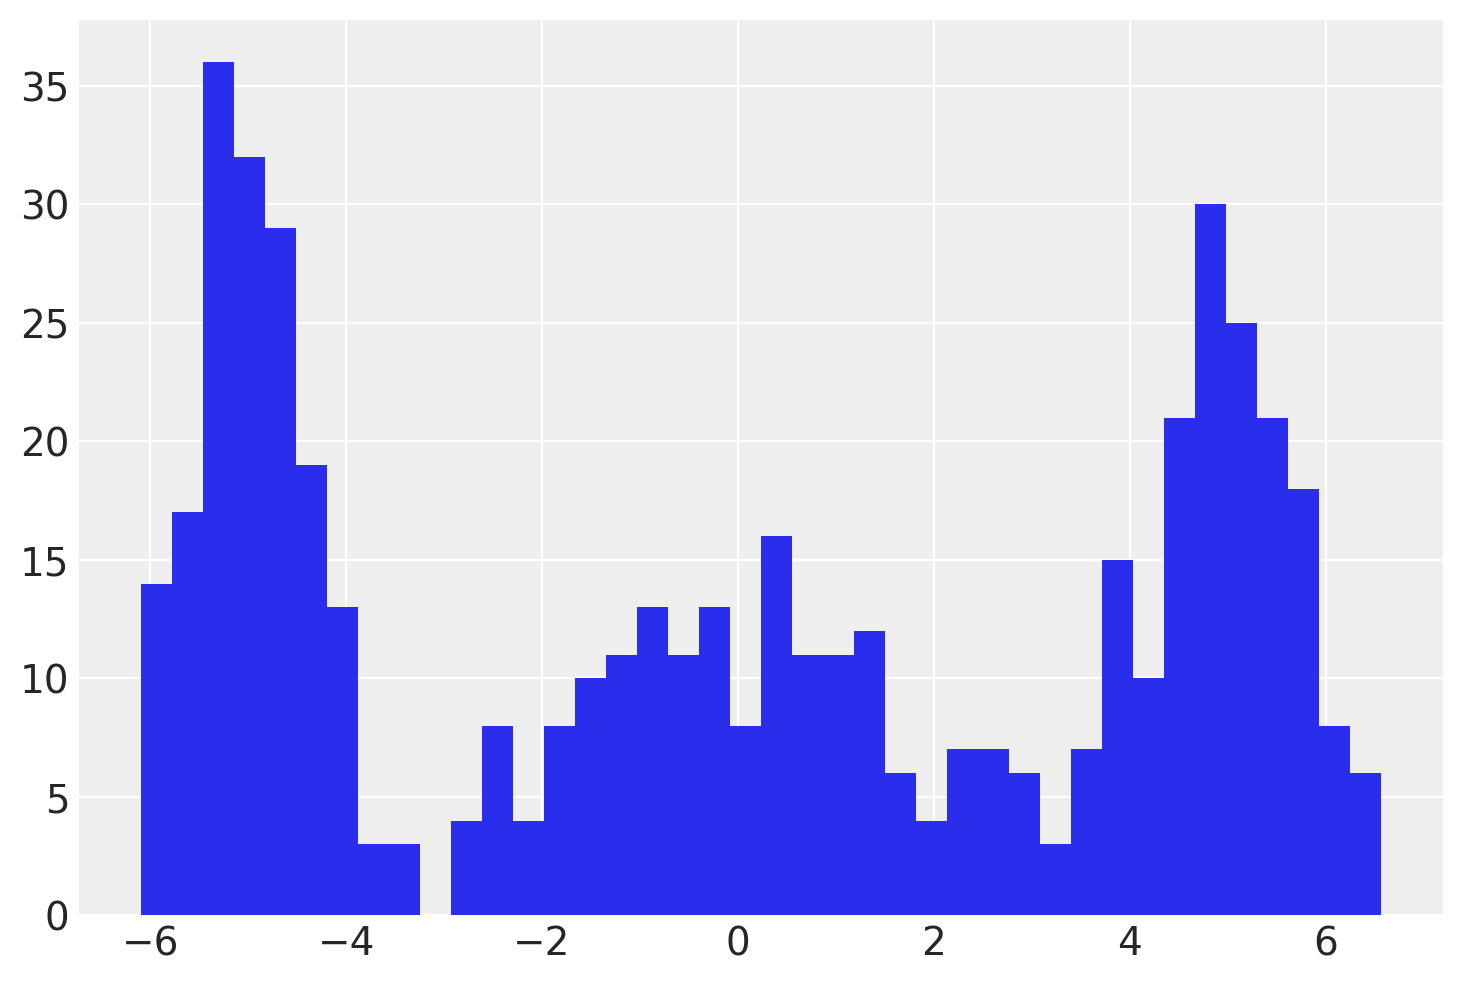

In [13]:
k = 3
ndata = 500
centers = np.array([-5, 0, 5])
sds = np.array([0.5, 2.0, 0.75])
idx = rng.integers(0, k, ndata)
x = rng.normal(loc=centers[idx], scale=sds[idx], size=ndata)
plt.hist(x, 40);

/opt/homebrew/lib/python3.11/site-packages/pymc/distributions/transforms.py:56: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)


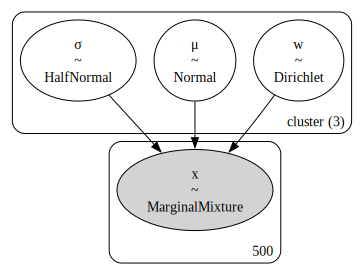

In [17]:
with pm.Model(coords={"cluster": range(k)}) as model:
    μ = pm.Normal(
        "μ",
        mu=0,
        sigma=5,
        transform=pm.distributions.transforms.univariate_ordered,
        initval=[-4, 0, 4],
        dims="cluster",
    )
    σ = pm.HalfNormal("σ", sigma=1, dims="cluster")
    weights = pm.Dirichlet("w", np.ones(k), dims="cluster")
    pm.NormalMixture("x", w=weights, mu=μ, sigma=σ, observed=x)

pm.model_to_graphviz(model)

In [18]:
with model:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, w]


/opt/homebrew/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Output()

In [ ]:
az.plot_trace(idata, var_names=["μ", "σ"], lines=[("μ", {}, [centers]), ("σ", {}, [sds])]);